<a href="https://colab.research.google.com/github/helloyaz/weatherwise_Yasmine_Kyaw_19473235/blob/main/weatherwise_Yasmine_Kyaw_19473235_starter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌦️ WeatherWise – Starter Notebook

Welcome to your **WeatherWise** project notebook! This scaffold is designed to help you build your weather advisor app using Python, visualisations, and AI-enhanced development.

---

📄 **Full Assignment Specification**  
See [`ASSIGNMENT.md`](ASSIGNMENT.md) or check the LMS for full details.

📝 **Quick Refresher**  
A one-page summary is available in [`resources/assignment-summary.md`](resources/assignment-summary.md).

---

🧠 **This Notebook Structure is Optional**  
You’re encouraged to reorganise, rename sections, or remove scaffold cells if you prefer — as long as your final version meets the requirements.

✅ You may delete this note before submission.



## 🧰 Setup and Imports

This section imports commonly used packages and installs any additional tools used in the project.

- You may not need all of these unless you're using specific features (e.g. visualisations, advanced prompting).
- The notebook assumes the following packages are **pre-installed** in the provided environment or installable via pip:
  - `requests`, `matplotlib`, `pyinputplus`
  - `fetch-my-weather` (for accessing weather data easily)
  - `hands-on-ai` (for AI logging, comparisons, or prompting tools)

If you're running this notebook in **Google Colab**, uncomment the following lines to install the required packages.


In [29]:
import os

os.environ['HANDS_ON_AI_SERVER'] = 'http://ollama.serveur.au'
os.environ['HANDS_ON_AI_MODEL'] = 'granite3.2'
os.environ['HANDS_ON_AI_API_KEY'] = input('Enter your API key: ')

Enter your API key: 


## 📦 Setup and Configuration
Import required packages and setup environment.

In [30]:
!pip install fetch-my-weather pyinputplus requests matplotlib hands-on-ai


In [31]:
import requests
import matplotlib.pyplot as plt
import pyinputplus as pyip

from fetch_my_weather import get_weather
from hands_on_ai.chat import get_response



## 🌤️ Weather Data Functions

In [102]:
def get_weather_data(city="Perth", forecast_days=3):
    if forecast_days > 3:
      print("⚠️ Sorry! Only up to 3 days of forecast can be provided.")

    try:
        url = f"https://wttr.in/{city}?format=j1"
        response = requests.get(url)
        data = response.json()

        current = data.get("current_condition", [{}])[0]
        weather_now = {
            "temp_C": current.get("temp_C", "N/A"),
            "condition": current.get("weatherDesc", [{}])[0].get("value", "Unknown")
        }

        print(f"\n📍 Weather for {city}")
        print(f"🌡️ Current Temperature: {weather_now['temp_C']}°C")
        print(f"⛅ Condition: {weather_now['condition']}")

        forecast_data = []
        weather_days = data.get("weather", [])[:forecast_days]

        if weather_days:
            print("\n📅 Temperature Forecast:")
            for day in weather_days:
                forecast = {
                    "date": day.get("date", "Unknown"),
                    "min_temp_C": day.get("mintempC", "N/A"),
                    "max_temp_C": day.get("maxtempC", "N/A"),
                    "condition": day.get("hourly", [{}])[4].get("weatherDesc", [{}])[0].get("value", "Unknown")
                }
                forecast_data.append(forecast)
                print(f"  • {forecast['date']}: {forecast['min_temp_C']}°C – {forecast['max_temp_C']}°C, {forecast['condition']}")
        else:
            print("⚠️ No forecast data available.")

        return {
            "city": city,
            "current": weather_now,
            "forecast": forecast_data
        }

    except Exception as e:
        print(f"\n❌ Error retrieving weather data for '{city}': {e}")
        return {"error": str(e)}


In [103]:
result = get_weather_data("Sydney", 4)
print(result)


⚠️ Sorry! Only up to 3 days of forecast can be provided.

📍 Weather for Sydney
🌡️ Current Temperature: 16°C
⛅ Condition: Light rain shower

📅 Temperature Forecast:
  • 2025-05-26: 12°C – 19°C, Sunny
  • 2025-05-27: 13°C – 17°C, Sunny
  • 2025-05-28: 12°C – 18°C, Sunny
{'city': 'Sydney', 'current': {'temp_C': '16', 'condition': 'Light rain shower'}, 'forecast': [{'date': '2025-05-26', 'min_temp_C': '12', 'max_temp_C': '19', 'condition': 'Sunny'}, {'date': '2025-05-27', 'min_temp_C': '13', 'max_temp_C': '17', 'condition': 'Sunny'}, {'date': '2025-05-28', 'min_temp_C': '12', 'max_temp_C': '18', 'condition': 'Sunny'}]}


## 📊 Visualisation Functions

In [106]:
import matplotlib.pyplot as plt

def create_temperature_visualisation(weather_data, output_type='display'):
    """
    Create visualisation of temperature forecast using bar chart.
    """

    forecast = weather_data.get("forecast", [])
    if not forecast:
        print("⚠️ No forecast data available to visualize.")
        return

    # Extract data for plotting
    dates = [day['date'] for day in forecast]
    min_temps = [int(day['min_temp_C']) for day in forecast]
    max_temps = [int(day['max_temp_C']) for day in forecast]

    # Create figure and axes
    fig, ax = plt.subplots(figsize=(8, 5))

    # Plot bars
    ax.bar(dates, min_temps, label='Min Temp (°C)', color='skyblue')
    ax.bar(dates, max_temps, label='Max Temp (°C)', color='orange', alpha=0.7)

    # Set labels and title
    ax.set_title(f"Temperature Forecast for {weather_data['city']}")
    ax.set_xlabel("Date")
    ax.set_ylabel("Temperature (°C)")
    ax.legend()
    ax.grid(True)

    # Show or return the figure
    if output_type == 'figure':
        return fig
    else:
        plt.show()



📍 Weather for Brisbane
🌡️ Current Temperature: 21°C
⛅ Condition: Clear

📅 Temperature Forecast:
  • 2025-05-26: 18°C – 24°C, Partly Cloudy 
  • 2025-05-27: 18°C – 26°C, Sunny


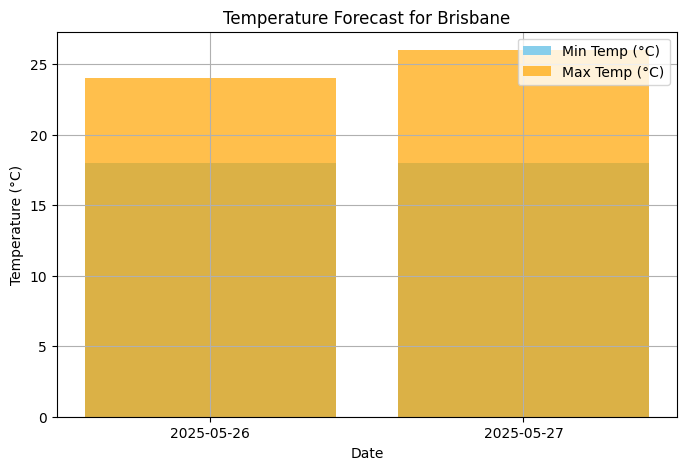

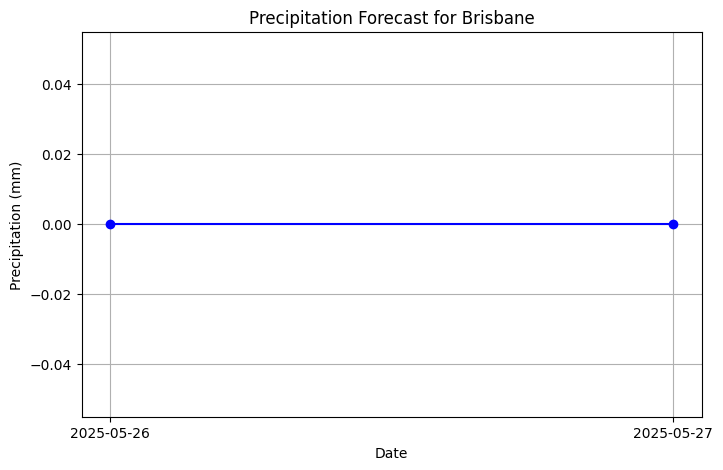

In [114]:
data = get_weather_data("Brisbane", 2)

create_temperature_visualisation(data)
create_precipitation_visualisation(data)

In [148]:
def describe_precipitation_forecast(weather_data):
    """
    Print a text-based summary of precipitation expectations from the forecast.

    Args:
        weather_data (dict): The processed weather data dictionary
    """
    if not weather_data:
        print("⚠️ No weather data provided.")
        return

    forecast = weather_data.get("forecast")
    if not forecast:
        print("⚠️ Forecast data is missing or empty.")
        return

    print("☔ Precipitation Overview:\n")

    for day in forecast:
        date = day.get("date", "Unknown date")
        condition = day.get("condition", "Unknown condition")

        condition_lower = condition.lower()

        if any(word in condition_lower for word in ["rain", "shower", "thunderstorm", "drizzle"]):
            emoji = "🌧️"
            message = "Best to pack an umbrella!☔"
        elif any(word in condition_lower for word in ["cloud", "overcast"]):
            emoji = "☁️"
            message = "Calls for a chill day indoors 😎 "
        elif "snow" in condition_lower:
            emoji = "❄️"
            message = "Possible snow - Might be a good idea to bundle up!🧣🧤"
        else:
            emoji = "☀️"
            message = "Clear skies, lovely day for a picnic~🧺"

        print(f"• {date}: {condition} {emoji} – {message}")



In [149]:
data = get_weather_data("Perth", 3)
describe_precipitation_forecast(data)



📍 Weather for Perth
🌡️ Current Temperature: 8°C
⛅ Condition: Clear

📅 Temperature Forecast:
  • 2025-05-26: 10°C – 18°C, Sunny
  • 2025-05-27: 11°C – 21°C, Sunny
  • 2025-05-28: 14°C – 22°C, Partly Cloudy 
☔ Precipitation Overview:

• 2025-05-26: Sunny ☀️ – Clear skies, lovely day for a picnic~🧺
• 2025-05-27: Sunny ☀️ – Clear skies, lovely day for a picnic~🧺
• 2025-05-28: Partly Cloudy  ☁️ – Calls for a chill day indoors 😎 


## 🤖 Natural Language Processing

In [37]:
# Define parse_weather_question() and generate_weather_response() here
def parse_weather_question(question):
    """
    Parse a natural language weather question.

    Args:
        question (str): User's weather-related question

    Returns:
        dict: Extracted information including location, time period, and weather attribute
    """
    pass

## 🧭 User Interface

In [38]:
# Define menu functions using pyinputplus or ipywidgets here

## 🧩 Main Application Logic

In [39]:
# Tie everything together here
def generate_weather_response(parsed_question, weather_data):
    """
    Generate a natural language response to a weather question.

    Args:
        parsed_question (dict): Parsed question data
        weather_data (dict): Weather data

    Returns:
        str: Natural language response
    """
    pass

## 🧪 Testing and Examples

In [40]:
# Include sample input/output for each function

## 🗂️ AI Prompting Log (Optional)
Add markdown cells here summarising prompts used or link to AI conversations in the `ai-conversations/` folder.